In [52]:
import os
import random
import shutil

# Define paths
source_dir = '/home/user/Pictures/ML/MAMvsMOH/archive'
train_dir = '/home/user/Pictures/ML/MAMvsMOH/train'
test_dir = '/home/user/Pictures/ML/MAMvsMOH/test'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Function to split dataset into train and test
def split_dataset(source_dir, train_dir, test_dir, split_ratio=0.8):
    for actor_folder in os.listdir(source_dir):
        actor_path = os.path.join(source_dir, actor_folder)
        if os.path.isdir(actor_path):
            # Create train and test directories for each actor
            os.makedirs(os.path.join(train_dir, actor_folder), exist_ok=True)
            os.makedirs(os.path.join(test_dir, actor_folder), exist_ok=True)

            # List images in the actor's folder
            images = os.listdir(actor_path)
            num_images = len(images)
            num_train = int(num_images * split_ratio)
            
            # Shuffle images randomly
            random.shuffle(images)
            
            # Move images to train and test directories
            for i, image in enumerate(images):
                src_path = os.path.join(actor_path, image)
                if i < num_train:
                    dst_path = os.path.join(train_dir, actor_folder, image)
                else:
                    dst_path = os.path.join(test_dir, actor_folder, image)
                shutil.move(src_path, dst_path)
                print(f'Moved {src_path} to {dst_path}')

# Split dataset with 80% train and 20% test ratio
split_dataset(source_dir, train_dir, test_dir, split_ratio=0.8)

print("Dataset split into train and test successfully.")


Dataset split into train and test successfully.


In [53]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [54]:
!pip install opencv-python
import cv2

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [55]:
from matplotlib import pyplot as plt

def cv2_imshow(image):
    # Convert image from BGR to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
tf.__version__

'2.16.1'

In [57]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('/home/user/Pictures/ML/MAMvsMOH/train',
                                                        target_size = (64, 64),
                                                        batch_size = 8,
                                                        class_mode = 'categorical',
                                                       shuffle = True)



Found 4046 images belonging to 2 classes.


In [46]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [47]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/home/user/Pictures/ML/MAMvsMOH/test',
                                                     target_size = (64, 64),
                                                     batch_size = 1,
                                                     class_mode = 'categorical',
                                                     shuffle = False)

Found 1012 images belonging to 2 classes.


In [48]:
network=Sequential()
network.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=577,activation='relu'))
network.add(Dense(units=2,activation='softmax'))


/home/user/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [49]:
network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 577)            │       665,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 577)            │       333,506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         1,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,019,335 (3.89 MB)

 Trainable params: 1,019,335 (3.89 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [51]:
history = network.fit(train_dataset, epochs=50)

Epoch 1/50
  7/506 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.3799 - loss: 0.8243

/home/user/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


506/506 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.5348 - loss: 0.6991
Epoch 2/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5412 - loss: 0.6899
Epoch 3/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5489 - loss: 0.6826
Epoch 4/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5658 - loss: 0.6678
Epoch 5/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6035 - loss: 0.6557
Epoch 6/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6193 - loss: 0.6451
Epoch 7/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6465 - loss: 0.6214
Epoch 8/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.6762 - loss: 0.5980
Epoch 9/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.6861 - loss: 0.5825
Epoch 10/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7058 - loss: 0.5440
Epoch 11/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.7294 - loss: 0.5301
Epoch 12/50
506/506 ━━━━━━━━━━━━━━━━━━━━ 

In [58]:
test_dataset.class_indices

{'mammooty': 0, 'mohanlal': 1}

In [59]:
predictions = network.predict(test_dataset)
predictions

1012/1012 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[9.9295580e-01, 7.0441598e-03],
       [9.9636996e-01, 3.6300195e-03],
       [6.5826035e-01, 3.4173962e-01],
       ...,
       [9.9775934e-01, 2.2406036e-03],
       [4.9732714e-03, 9.9502677e-01],
       [2.5203148e-10, 1.0000000e+00]], dtype=float32)

In [60]:
predictions = np.argmax(predictions, axis = 1)
predictions

array([0, 0, 0, ..., 0, 1, 1])

In [61]:
test_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)


0.808300395256917

In [63]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       459
           1       0.85      0.79      0.82       553

    accuracy                           0.81      1012
   macro avg       0.81      0.81      0.81      1012
weighted avg       0.81      0.81      0.81      1012



In [64]:
save_path = '/home/user/Pictures/ML/MAMvsMOH/actor_classifier_83.h5'
network.save(save_path)
print(f'Model saved to {save_path}')

Model saved to /home/user/Pictures/ML/MAMvsMOH/actor_classifier_83.h5


In [72]:
pip install --upgrade matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [69]:
from tensorflow.keras.models import load_model

# Path to the saved model
save_path = '/home/user/Pictures/ML/MAMvsMOH/actor_classifier_83.h5'

# Load the model
network = load_model(save_path)
print(f'Model loaded from {save_path}')


Model loaded from /home/user/Pictures/ML/MAMvsMOH/actor_classifier_83.h5


In [67]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tkinter import Tk, Label, Button, filedialog
from PIL import Image, ImageTk

# Path to the saved model
save_path = '/home/user/Pictures/ML/MAMvsMOH/actor_classifier_83.h5'

# Load the model
network = load_model(save_path)
print(f'Model loaded from {save_path}')

# Class labels
class_labels = ['Mammootty', 'Mohanlal']

def predict_actor(image_path):
    # Load the image
    img = load_img(image_path, target_size=(64, 64))
    # Convert the image to array
    img_array = img_to_array(img)
    # Reshape the image to the shape that the model expects
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize the image array
    img_array /= 255.0

    # Predict the class
    prediction = network.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_label = class_labels[class_idx]

    return class_label

def upload_image():
    # Open file dialog to select an image
    file_path = filedialog.askopenfilename()
    if file_path:
        # Load and display the image
        img = Image.open(file_path)
        img.thumbnail((200, 200))
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img

        # Predict the class of the uploaded image
        predicted_class = predict_actor(file_path)
        result_label.config(text=f'Predicted class: {predicted_class}')

# Create the main window
root = Tk()
root.title("Actor Classifier")

# Create and place the widgets
upload_button = Button(root, text="Upload Image", command=upload_image)
upload_button.pack()

image_label = Label(root)
image_label.pack()

result_label = Label(root, text="")
result_label.pack()

# Start the GUI event loop
root.mainloop()


ImportError: cannot import name 'ImageTk' from 'PIL' (/usr/lib/python3/dist-packages/PIL/__init__.py)

In [3]:
# Perform prediction
predictions = model.predict(img_array)

# Convert predictions to class labels
predicted_class = np.argmax(predictions, axis=1)[0]
class_names = ['mammooty', 'mohanlal']
predicted_label = class_names[predicted_class]

print(f"The predicted class is: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The predicted class is: mammooty


In [1]:
!pip install fastai

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import os
from fastai.vision.all import *
from fastai.vision import *
import pandas as pd

In [3]:
Dataset_path='/home/user/Pictures/ML/MAMvsMOH/test/'
class_names = []
for folder_name in os.listdir(Dataset_path):
  class_names.append(folder_name)

In [4]:
class_names

['mohanlal', 'mammooty']

In [5]:
os.listdir(Dataset_path)

['mohanlal', 'mammooty']

In [6]:
#Load the data
dls = ImageDataLoaders.from_folder(
    path=Dataset_path,
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()],
    valid_pct=0.2
)

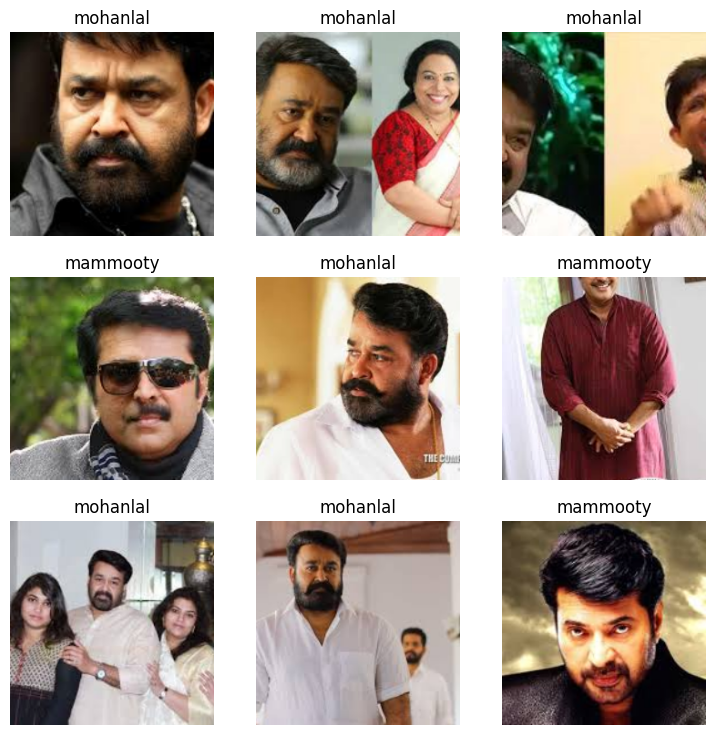

In [7]:
dls.show_batch()

In [8]:
#create model
model=vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy,error_rate]
)

In [9]:
model.fit(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.296099,1.008673,0.683168,0.316832,01:22


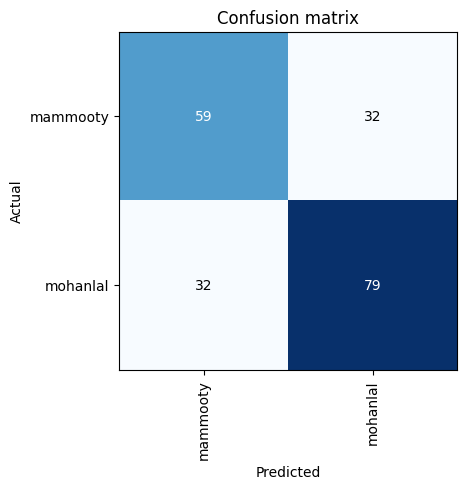

In [10]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

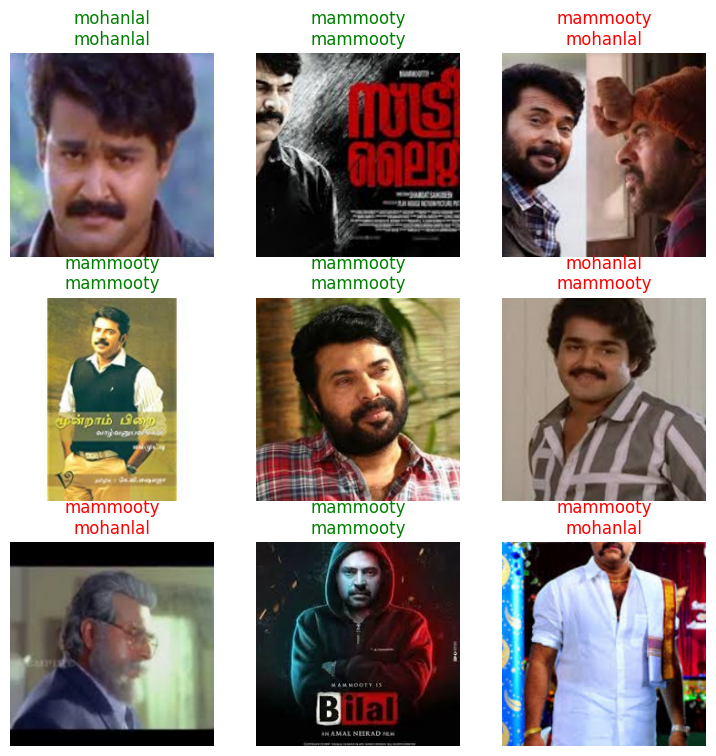

In [11]:
model.show_results()

In [12]:
%cd /home/user/Pictures/ML/MAMvsMOH
model.export('acter_classifier_83.pkl')

In [14]:
new_model = load_learner('/home/user/Pictures/ML/MAMvsMOH/acter_classifier_83.pkl')

In [15]:
new_model.predict(
    item='/home/user/Pictures/ML/MAMvsMOH/test/mohanlal/4.jpeg'
)


('mohanlal', tensor(1), tensor([0.3727, 0.6273]))